# Food database management

## Environment setup

In [1]:
# Prerequisites


In [ ]:
# Imports
import pandas as pd

## Data

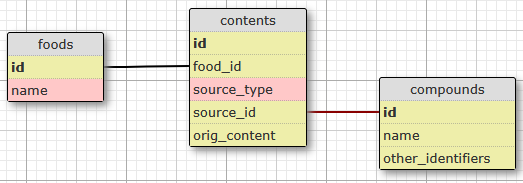

In [ ]:
foods = pd.read_csv("data/data_raw/foods.csv")
compounds = pd.read_csv("data/data_raw/compounds.csv")
contents = pd.read_csv("data/data_raw/contents.csv")

In [10]:
foods

,id,name
0,1,Apple
1,2,Banana
2,3,Carrot
3,4,Egg
4,5,Chicken
5,6,Rice
6,7,Tomato
7,8,Spinach
8,9,Salmon
9,10,Almond


In [11]:
compounds

,id,name,other_identifiers
0,1,Water,ID3732
1,2,Vitamin C,ID4264
2,3,Potassium,ID5859
3,4,Protein,ID8891
4,5,Vitamin D,ID5373
5,6,Carbohydrate,ID6874
6,7,Lycopene,ID7744
7,8,Iron,ID4468
8,9,Omega-3,ID1705
9,10,Fiber,ID3599


In [12]:
contents

,food_id,source_id,source_type,orig_content
0,4,10,Compound,82.70
1,10,1,Other,50.98
2,8,11,Compound,8.73
3,6,15,Other,66.04
4,4,7,Other,20.74
...,...,...,...,...
95,9,5,Compound,80.72
96,5,13,Compound,64.04
97,8,2,Compound,36.87
98,1,8,Compound,31.34


## Challenge

### Input

Your script should take a predefined list of compound names as input. For example: ['Caffeine', 'Theobromine', 'Ascorbic acid'].

In [13]:
compound_input = ["Sodium","Omega-3","Protein"]

### Data Extraction & Integration  

* Simulate querying the database by loading CSVs that represent the foods, compounds, and contents tables.
* Write the logic to join these tables to create a single, unified dataset that links food names to compound names and their corresponding concentrations (orig_content).
* Your logic must correctly handle the polymorphic relationship in the contents table (i.e., you only care about rows where source_type is 'Compound').

In [31]:
contents_with_compounds = contents[contents["source_type"]=="Compound"]
contents_with_compounds.head()

,food_id,source_id,source_type,orig_content
0,4,10,Compound,82.70
2,8,11,Compound,8.73
14,4,9,Compound,71.55
15,3,14,Compound,49.13
20,6,6,Compound,17.49


In [35]:
contents_and_compounds = contents_with_compounds.merge(compounds, how="inner", left_on="source_id", right_on="id")
contents_and_compounds.head()

,food_id,source_id,source_type,orig_content,id,name,other_identifiers
0,4,10,Compound,82.70,10,Fiber,ID3599
1,9,10,Compound,91.06,10,Fiber,ID3599
2,2,10,Compound,72.80,10,Fiber,ID3599
3,4,10,Compound,58.06,10,Fiber,ID3599
4,8,11,Compound,8.73,11,Calcium,ID3222


In [38]:
merged_files = contents_and_compounds.merge(foods, how="inner", left_on="food_id", right_on="id",suffixes=("_compounds","_foods"))
merged_files.head()

,food_id,source_id,source_type,orig_content,id_compounds,name_compounds,other_identifiers,id_foods,name_foods
0,4,10,Compound,82.70,10,Fiber,ID3599,4,Egg
1,4,10,Compound,58.06,10,Fiber,ID3599,4,Egg
2,4,9,Compound,71.55,9,Omega-3,ID1705,4,Egg
3,4,14,Compound,30.90,14,Sodium,ID1537,4,Egg
4,4,5,Compound,3.34,5,Vitamin D,ID5373,4,Egg


In [39]:
merged_files.shape

(47, 9)

### Filter for Target Compounds

From your unified dataset, select only the records for the compounds specified in your input list.

In [47]:
filtered_compounds = merged_files[merged_files["name_compounds"].isin(compound_input)]
filtered_compounds

,food_id,source_id,source_type,orig_content,id_compounds,name_compounds,other_identifiers,id_foods,name_foods
2,4,9,Compound,71.55,9,Omega-3,ID1705,4,Egg
3,4,14,Compound,30.90,14,Sodium,ID1537,4,Egg
18,8,14,Compound,30.77,14,Sodium,ID1537,8,Spinach
21,6,9,Compound,84.55,9,Omega-3,ID1705,6,Rice
25,6,4,Compound,63.40,4,Protein,ID8891,6,Rice
32,10,9,Compound,68.06,9,Omega-3,ID1705,10,Almond
33,10,9,Compound,9.29,9,Omega-3,ID1705,10,Almond
34,10,9,Compound,8.74,9,Omega-3,ID1705,10,Almond
35,10,14,Compound,53.67,14,Sodium,ID1537,10,Almond
36,7,9,Compound,83.97,9,Omega-3,ID1705,7,Tomato


### Rank Foods for Each Compound

* For each unique compound from your input list, find all the foods that contain it.
* Rank these foods in descending order based on the compound's concentration (orig_content).

In [58]:
sorted_and_filtered_compounds = filtered_compounds.sort_values(by=["name_compounds","orig_content"], ascending=[True,False])
sorted_and_filtered_compounds

,food_id,source_id,source_type,orig_content,id_compounds,name_compounds,other_identifiers,id_foods,name_foods
21,6,9,Compound,84.55,9,Omega-3,ID1705,6,Rice
36,7,9,Compound,83.97,9,Omega-3,ID1705,7,Tomato
2,4,9,Compound,71.55,9,Omega-3,ID1705,4,Egg
32,10,9,Compound,68.06,9,Omega-3,ID1705,10,Almond
33,10,9,Compound,9.29,9,Omega-3,ID1705,10,Almond
34,10,9,Compound,8.74,9,Omega-3,ID1705,10,Almond
25,6,4,Compound,63.40,4,Protein,ID8891,6,Rice
45,1,4,Compound,52.28,4,Protein,ID8891,1,Apple
44,1,4,Compound,9.32,4,Protein,ID8891,1,Apple
35,10,14,Compound,53.67,14,Sodium,ID1537,10,Almond


In [67]:
sorted_and_filtered_compounds["food_rank"] = sorted_and_filtered_compounds.groupby("name_compounds")["orig_content"].rank(ascending=False)
sorted_and_filtered_compounds

,food_id,source_id,source_type,orig_content,id_compounds,name_compounds,other_identifiers,id_foods,name_foods,food_rank
21,6,9,Compound,84.55,9,Omega-3,ID1705,6,Rice,1.0
36,7,9,Compound,83.97,9,Omega-3,ID1705,7,Tomato,2.0
2,4,9,Compound,71.55,9,Omega-3,ID1705,4,Egg,3.0
32,10,9,Compound,68.06,9,Omega-3,ID1705,10,Almond,4.0
33,10,9,Compound,9.29,9,Omega-3,ID1705,10,Almond,5.0
34,10,9,Compound,8.74,9,Omega-3,ID1705,10,Almond,6.0
25,6,4,Compound,63.40,4,Protein,ID8891,6,Rice,1.0
45,1,4,Compound,52.28,4,Protein,ID8891,1,Apple,2.0
44,1,4,Compound,9.32,4,Protein,ID8891,1,Apple,3.0
35,10,14,Compound,53.67,14,Sodium,ID1537,10,Almond,1.0


### Generate a Final Report

Create a single CSV file named compound_food_source_report.csv. This report should consolidate the top 5 food sources for each target compound.

In [77]:
output_df = sorted_and_filtered_compounds[["name_compounds","food_rank","name_foods","orig_content"]]
output_df = output_df.rename(columns={
    "name_compounds": "compound_name",
    "name_foods": "food_name",
    "orig_content": "concentration"
})
output_df = output_df[output_df["food_rank"]<6]
output_df = output_df.reset_index(drop=True)

output_df

,compound_name,food_rank,food_name,concentration
0,Omega-3,1.0,Rice,84.55
1,Omega-3,2.0,Tomato,83.97
2,Omega-3,3.0,Egg,71.55
3,Omega-3,4.0,Almond,68.06
4,Omega-3,5.0,Almond,9.29
5,Protein,1.0,Rice,63.40
6,Protein,2.0,Apple,52.28
7,Protein,3.0,Apple,9.32
8,Sodium,1.0,Almond,53.67
9,Sodium,2.0,Carrot,49.13


In [78]:
output_df.to_csv("compound_food_source_report.csv", index=False)